In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
reit = screen_funds('Alternatives')
commodity = screen_funds('Commodities', min_assets=.2)
print(len(reit), len(commodity))
quote = Quote(reit + commodity, 90, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

12 21
from 2019-04-22 to 2019-07-18 - 33


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

21


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
SGOL,58,0.182845,0.341751,0.510638,11.885751,2.692057
BAR,58,0.182066,0.340570,0.510125,12.013390,2.700990
GLD,58,0.181890,0.339251,0.511586,11.788647,2.667662
IAU,58,0.181559,0.346106,0.500498,11.793608,2.716592
PALL,58,0.161807,0.645991,0.237578,9.172187,11.245765
GLTR,58,0.139016,0.317539,0.411550,9.376717,3.584793
PSLV,58,0.130929,0.405740,0.302153,10.735676,4.805911
XLRE,58,0.107325,0.370021,0.267529,7.001773,4.835459
ICF,58,0.103011,0.375207,0.252335,7.337050,4.991450


evicted VNQI 0.802 0.061
evicted PSLV 0.774 -0.237
evicted RWX 0.677 -0.110
evicted PALL 0.312 0.193
retry backlogs ['XLRE', 'BAR', 'SGOL', 'GLTR', 'VNQ', 'IYR', 'IAU', 'RWR', 'SCHH', 'ICF', 'SIVR', 'SLV', 'USRT', 'RWO'] at 0.905/-0.51 - 0.629
evicted SLV 0.715 -0.281
retry backlogs ['RWR', 'XLRE', 'BAR', 'SGOL', 'IAU', 'IYR', 'VNQ', 'GLTR', 'SIVR', 'ICF', 'SCHH', 'RWO', 'USRT'] at 0.910/-0.52 - 0.629
evicted SIVR 0.716 -0.279
retry backlogs ['RWR', 'XLRE', 'BAR', 'SGOL', 'IAU', 'IYR', 'VNQ', 'GLTR', 'ICF', 'SCHH', 'RWO', 'USRT'] at 0.915/-0.53 - 0.629
retry backlogs ['RWR', 'XLRE', 'BAR', 'SGOL', 'IAU', 'VNQ', 'IYR', 'GLTR', 'SCHH', 'RWO', 'USRT', 'ICF'] at 0.920/-0.54 - 0.629
retry backlogs ['RWR', 'XLRE', 'BAR', 'SGOL', 'IAU', 'VNQ', 'IYR', 'GLTR', 'SCHH', 'RWO', 'USRT', 'ICF'] at 0.925/-0.55 - 0.629
retry backlogs ['RWR', 'XLRE', 'BAR', 'SGOL', 'IAU', 'VNQ', 'IYR', 'GLTR', 'SCHH', 'RWO', 'USRT', 'ICF'] at 0.930/-0.56 - 0.629
retry backlogs ['RWR', 'XLRE', 'BAR', 'SGOL', 'IAU', 'VNQ

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,58.0,0.120760,0.178868,-0.343329,-0.020284,0.113999,0.236046,0.500683,0.628546,7.440451,1.713626
GLD,58.0,0.181890,0.339251,-0.497640,-0.002073,0.113558,0.300108,1.157343,0.511586,11.788647,2.667662
REET,58.0,0.077777,0.279406,-0.563882,-0.136767,0.105179,0.279912,0.674511,0.248539,5.329546,3.361345
DBA,58.0,0.028441,0.334276,-0.616276,-0.194938,0.000000,0.327512,0.732414,0.060153,-0.641864,5.928617


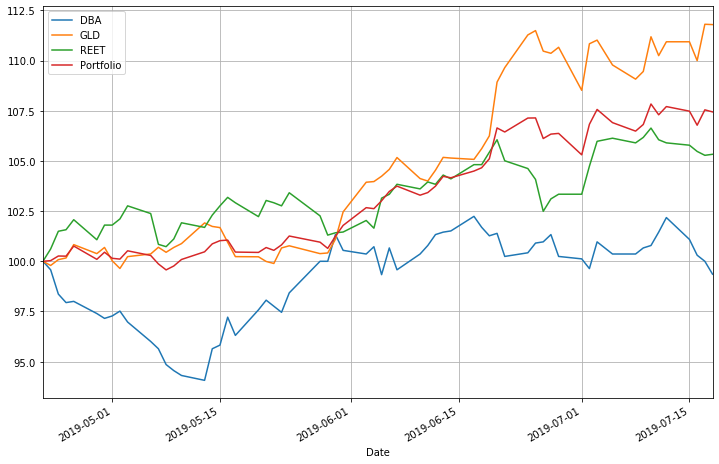

In [4]:
bounds = .08, .12
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=2, bounds=bounds)
quote.setup_mask(['DBA', 'GLD', 'REET'])
sd.update(quote.optimize_portfolio(_lambda=2, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=2, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)